### ANCHORING TO CONCRETE

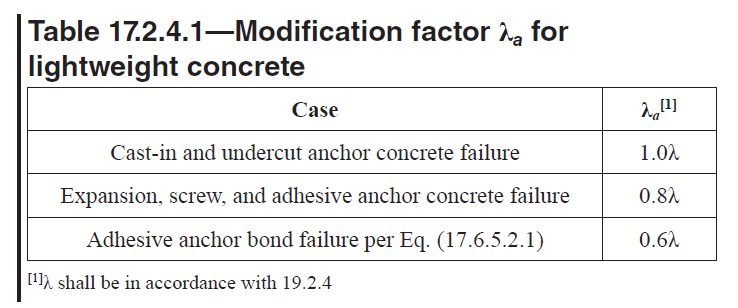
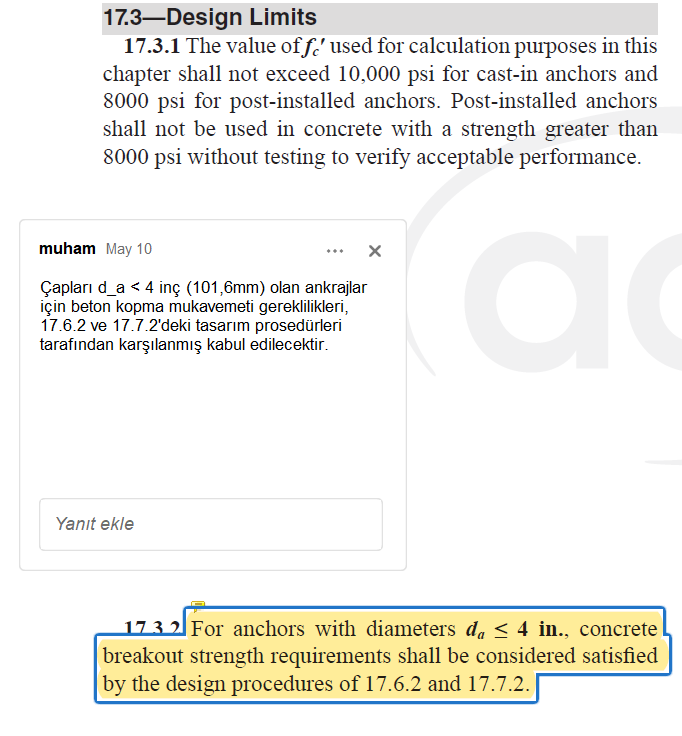
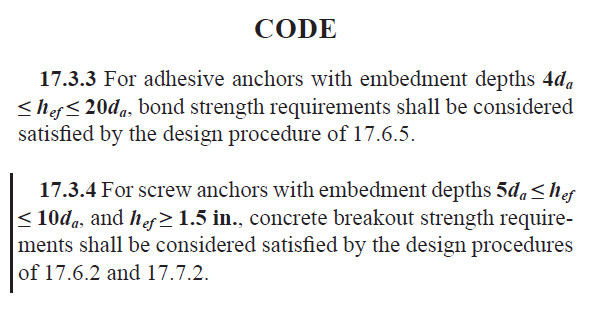
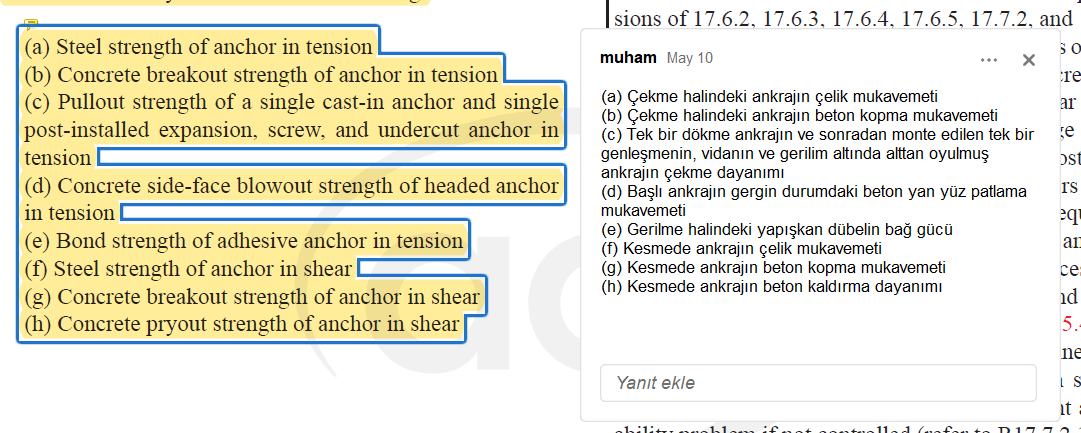
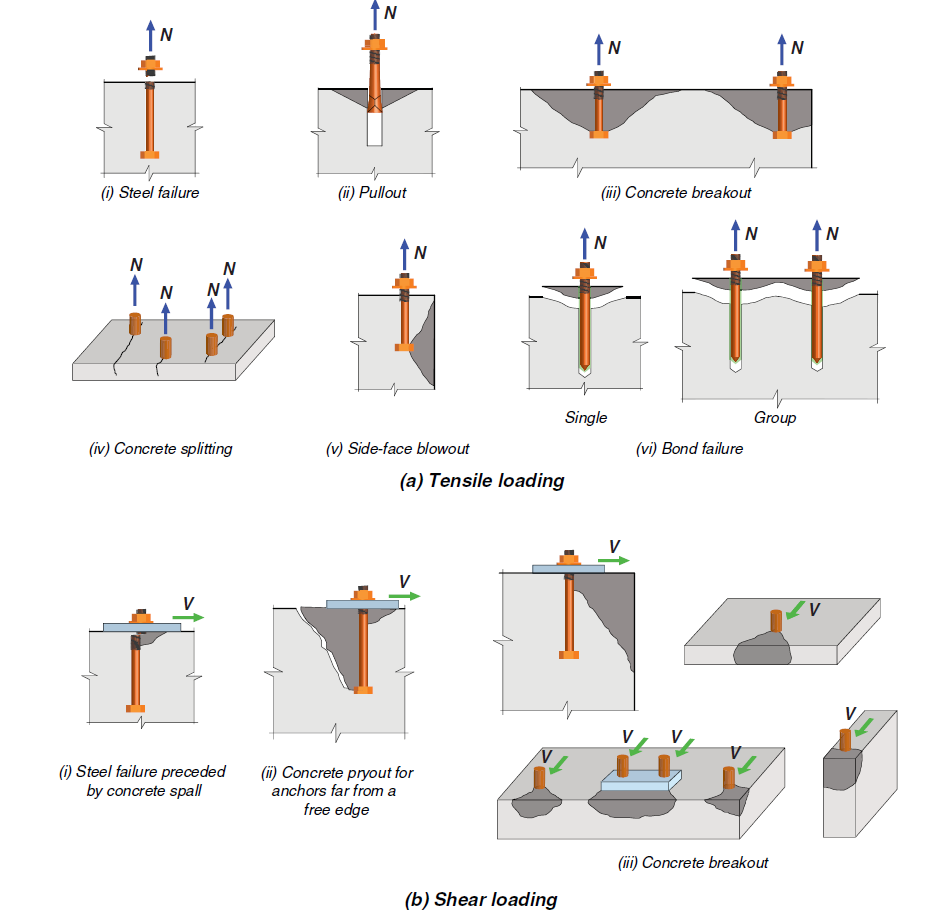
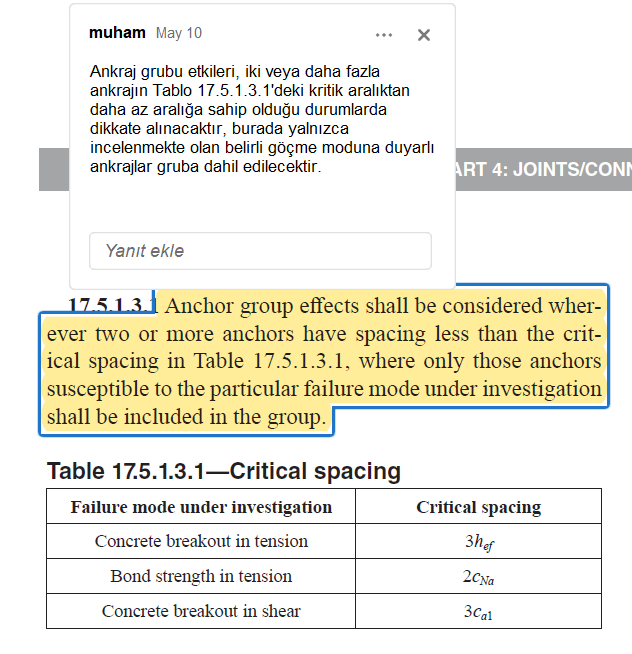
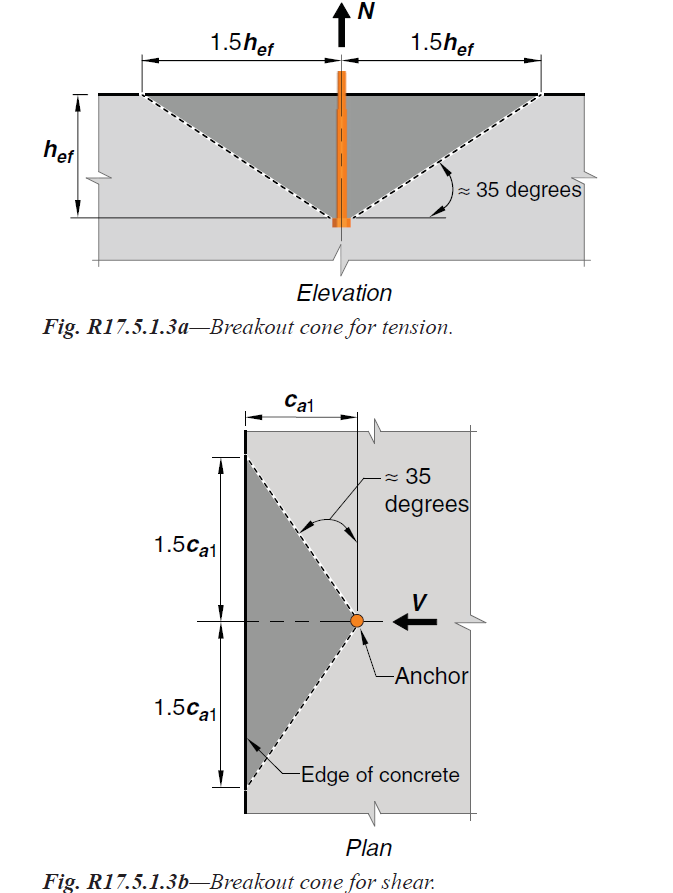
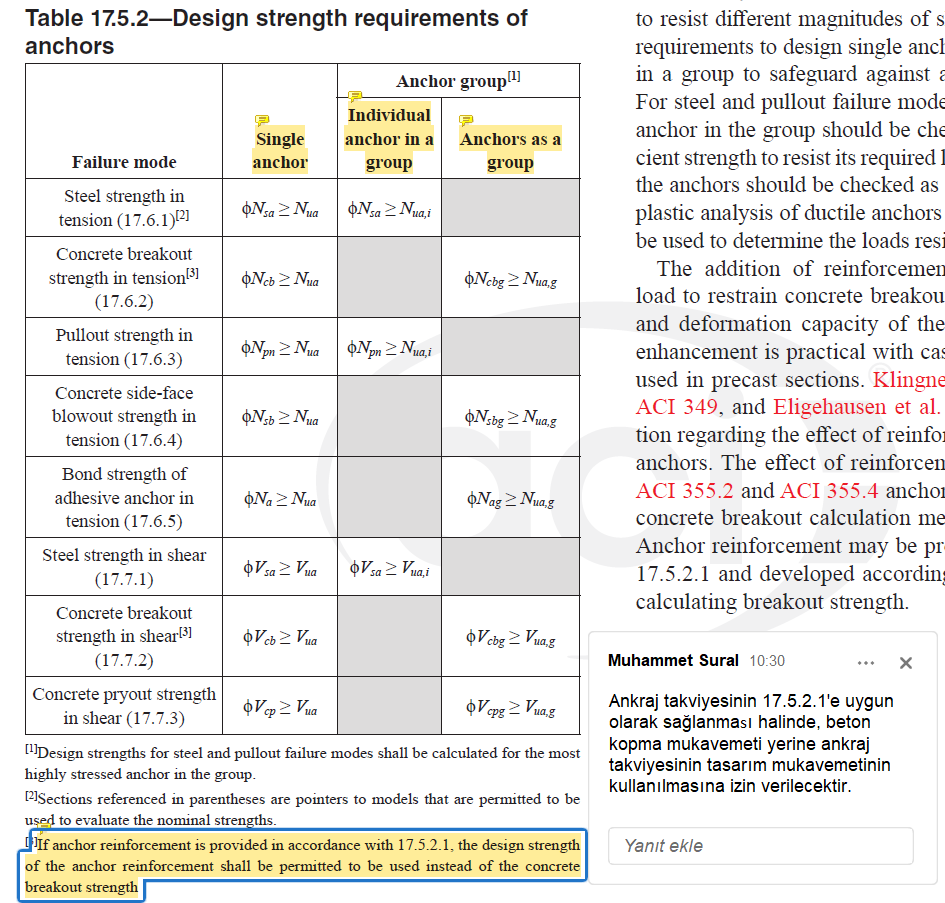

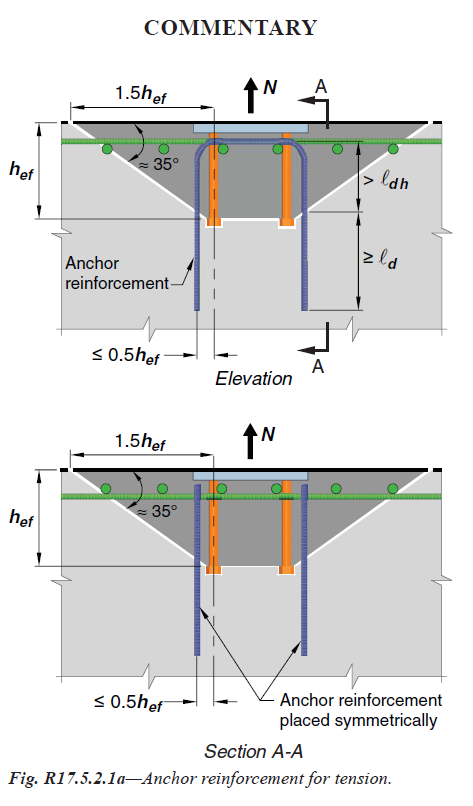
![alt text](image.png)
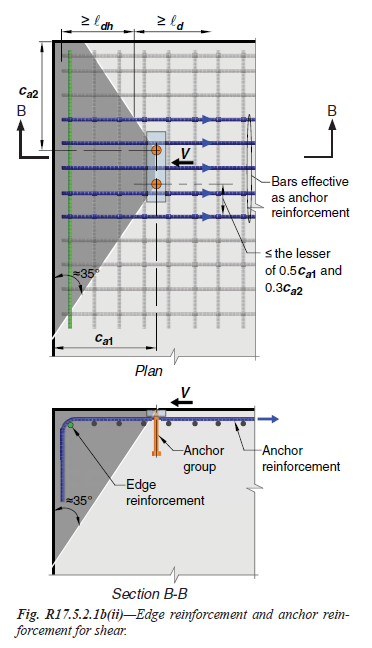

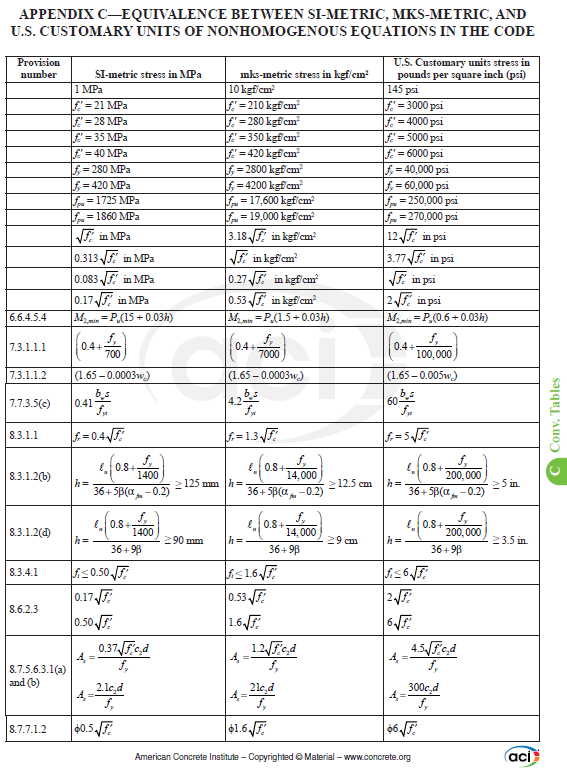

1 - Tensile strength

1a - Steel strength of anchors in tension, Nsa

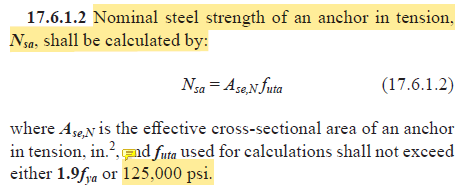

1b - Concrete breakout strength of anchors in tension,Ncb

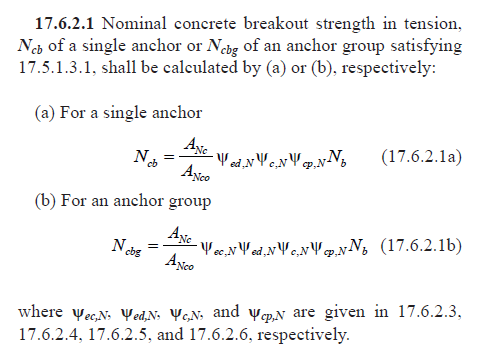
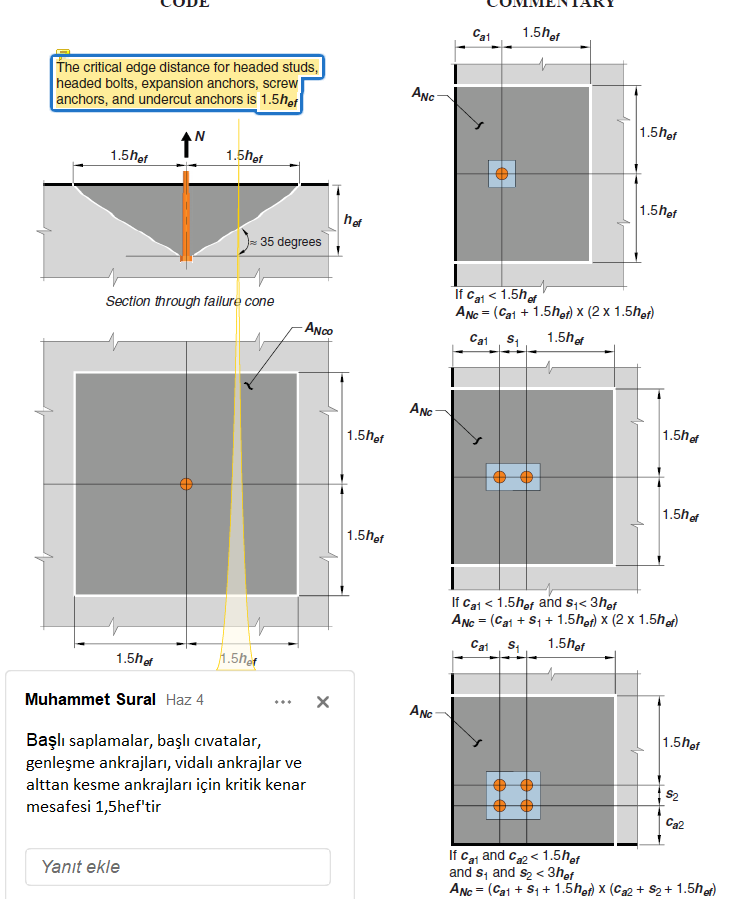
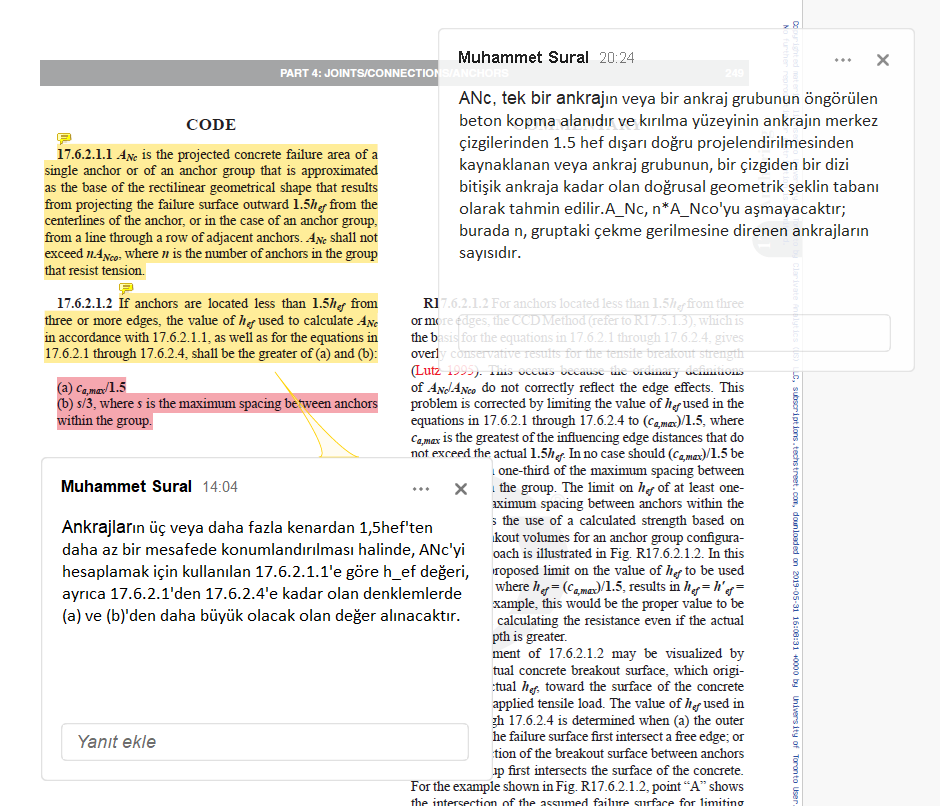
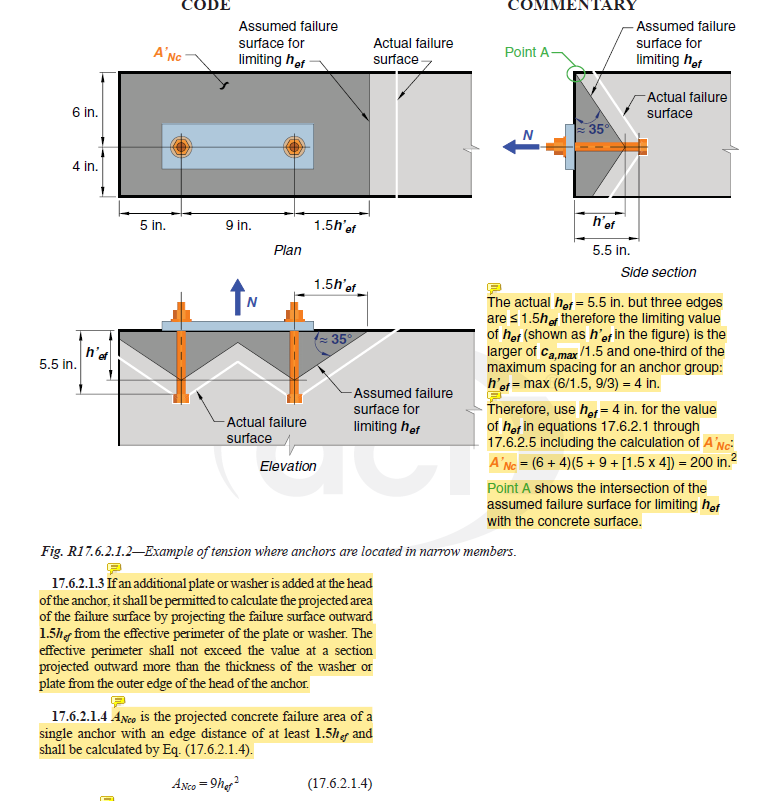

Basic single anchor breakout strength, Nb

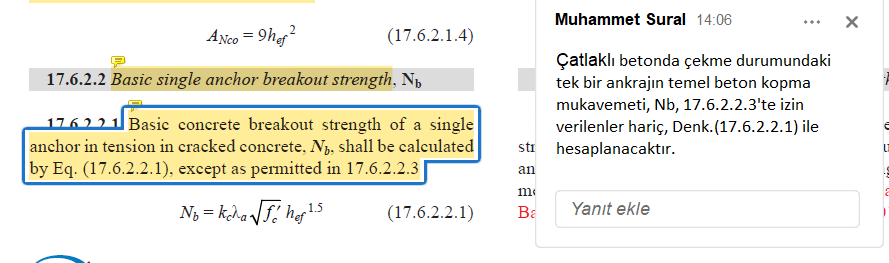
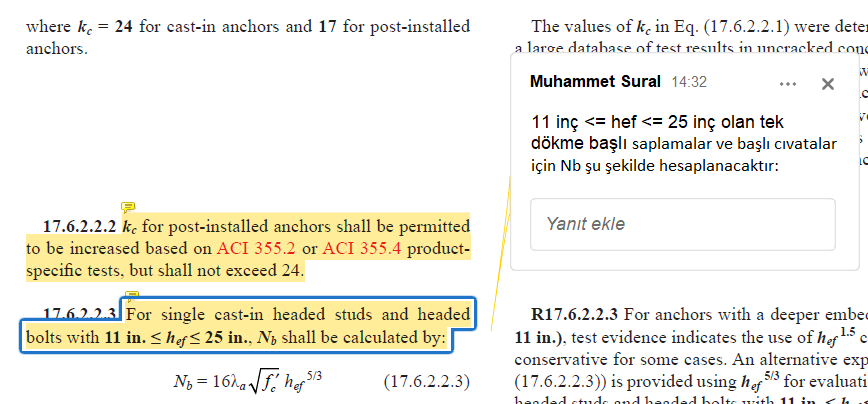

Breakout eccentricity factor, Psi_ec,N

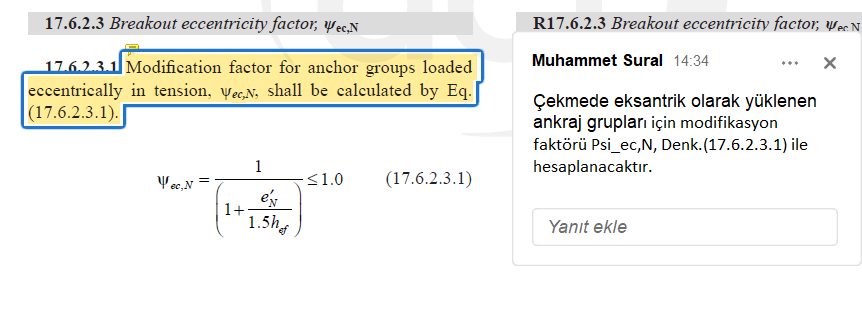
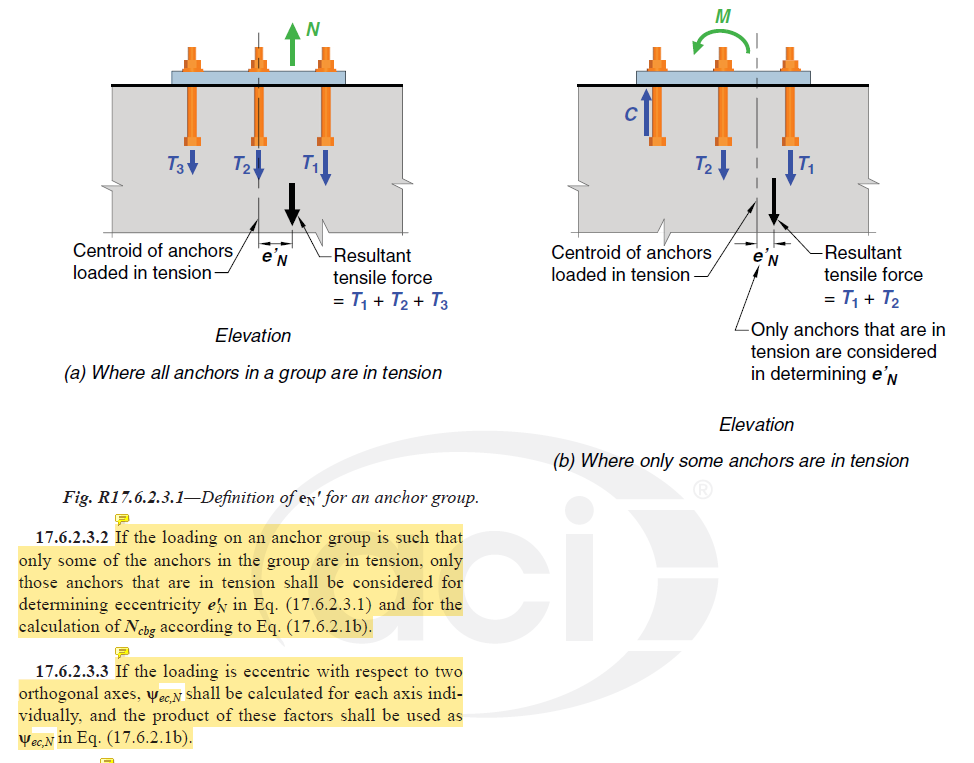

Breakout edge effect factor Psi_ed,N
Breakout cracking factor, Psi_c,N


# Base Plate

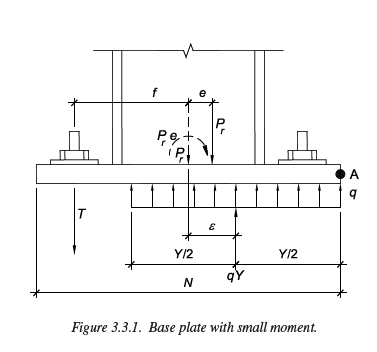

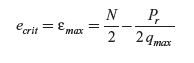

3.3.1 Concrete Bearing Stress

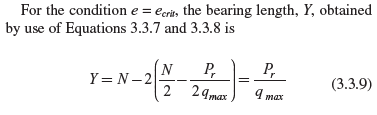

3.3.2 Base Plate Flexural Yielding Limit at Bearing Interface

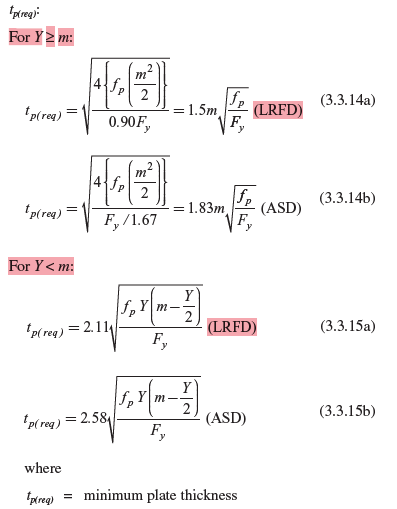

3.3.3 Base Plate Flexural Yielding at Tension Interface

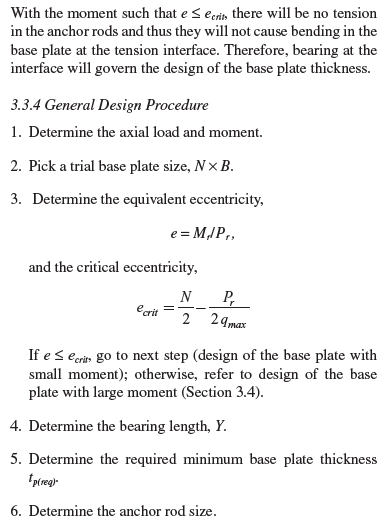

3.4 Design of Column Base Plates with Large Moments

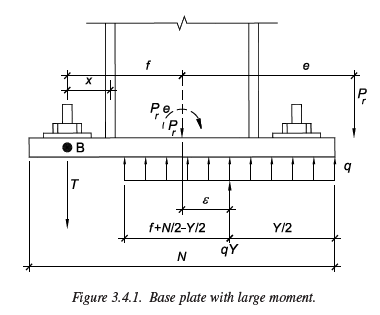

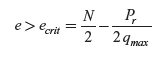

3.4.1 Concrete Bearing and Anchor Rod Forces

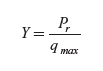

3.4.2 Base Plate Yielding Limit at Bearing Interface

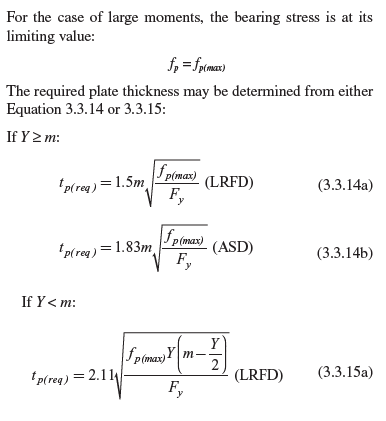

3.4.3 Base Plate Yielding Limit at Tension Interface

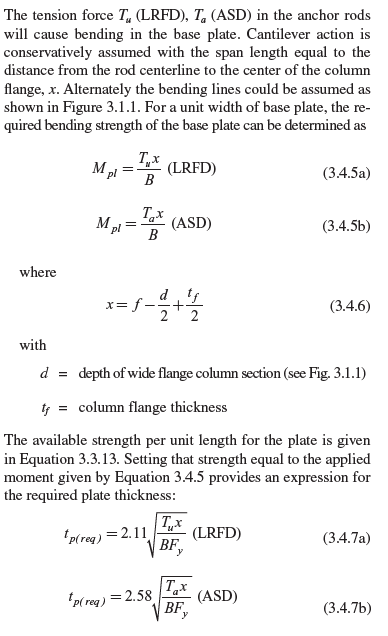

3.4.4 General Design Procedure

1. Determine the axial load and moment.
2. Pick a trial base plate size, N × B.
3. Determine the equivalent eccentricity
        e = Mr/Pr

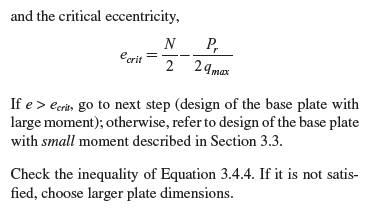

4. Determine the equivalent bearing length, Y and tensile
force in the anchor rod, Tu (LRFD), Ta (ASD).
5. Determine the required minimum base plate thickness
tp(req) at bearing and tension interfaces. Choose the larger
value.
6. Determine the anchor rod size.


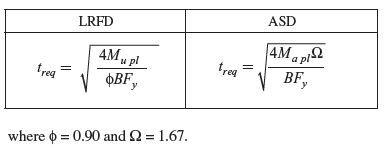

B.3 Determination of Required Stress and Effects of Eccentricity

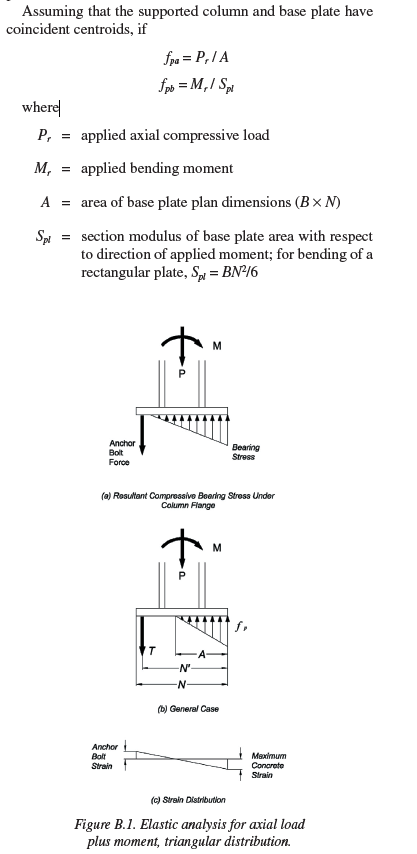

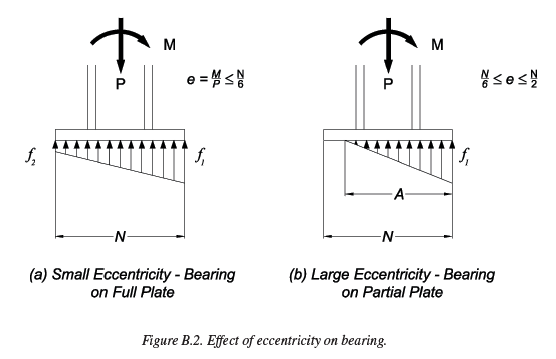

B.4.1 Design Procedure for a Small Moment Base

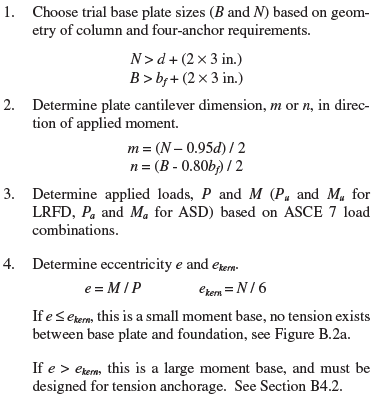

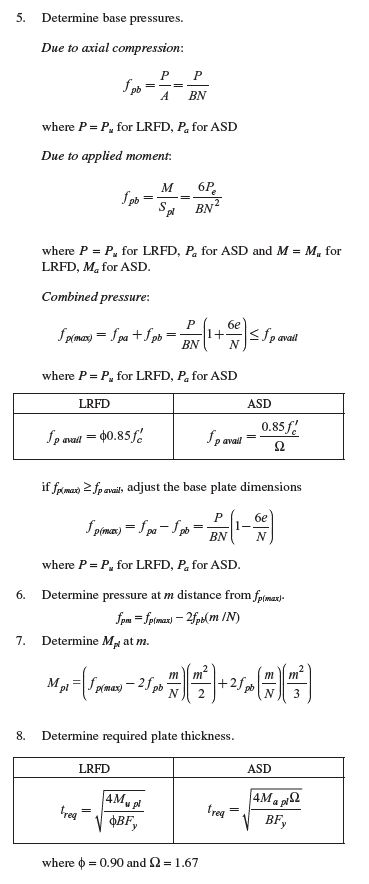


B.4.2 Design Procedure for a Large Moment Base

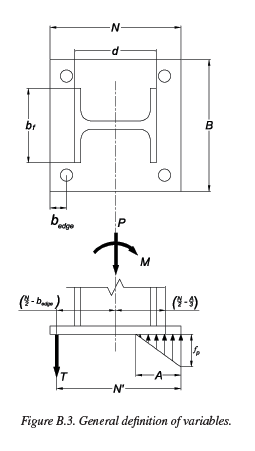

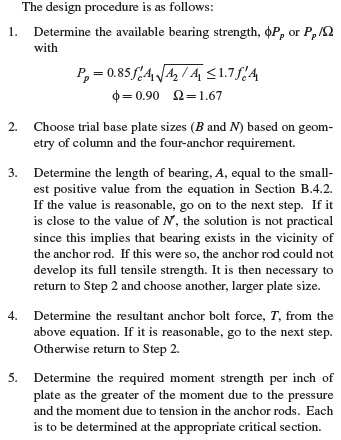

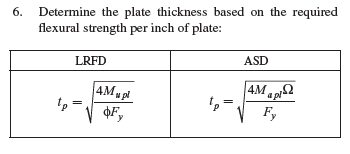

In [201]:
"""
Taban plakasının genişlik ve yüksekliğinin aynı olması uygulama, malzeme kesim ve temini açısından büyük avantajdır bu nedenle aynı olduğu kabul edilecek. Rijitleştirme levhaları ilk aşamada hesaplarda göz önüne alınmayacak.

TASARIM ADIMLARI
 1- Analiz sonucundan gelen Pu,Mu,Vu değerleri
 2- Taban plakası başlangıç boyutlarının tespiti B==N ==> max(bf+100 , d+100)
 3- Yük dış merkezliği e=Mu/Pu; f_pmax, q_max ve e_crit bulunması
 4- Basınç alanı uzunluğu Y 
 5- Taşıma gücü kontrolü q_max = f_p(max) * B(or N) > q = Pu/Y
 6- Plaka kalınlığının bulunması t
"""
import math


def ApproximateBasePlateArea(P_u : float, f_c : float, Case : int = 3, fi : float = 0.65)-> float:
    """
        A1 : Taban plakasi alani
        A2 : Beton yüzey alani

        Case 1 : A1 = A2
        Case 2 : A2 >= 4A1
        Case 3 : A1 < A2 < 4A1

    """
    if Case == 1:
        A1_req = P_u / (fi * 0.85 * f_c)

    if Case == 2 or Case == 3:
        A1_req = P_u / (2 * fi * 0.85 * f_c)
    return round(A1_req,0)

def FindPlateDimensions(d : float, b_f : float, A1_req : float)-> int:
    delta = (0.95 * d - 0.8 * b_f) / 2
    
    N_1 = A1_req**0.5 + delta
    N_2 = d + 2 * 3#inç - 3inç yerine 80mm olmalı
    N = max(N_1,N_2)

    B_1 = A1_req / N
    B_2 = b_f + 2 * 3#inç - 3inç yerine 80mm olmalı
    B = max(B_1,B_2)

    N = math.ceil(max(B,N))
    B = N
    A_baseplate = B * N
    if A1_req > A_baseplate:
        raise f"A1_req = {A1_req} > {A_baseplate} = A_baseplate"
    else:
        print("Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.")
    
    # while N%5 != 0:
    #         N = N+1
    #         B = B + 1
    return N

def e_Get(M_u : float, P_u : float)-> float:
    return round(M_u/P_u,2)

def f_pmax_Get(f_c : float, A1 : float, A2 : float, fi : float = 0.65)-> float:
    if A2 < A1:
        raise ValueError("A2, A1'den küçük olamaz!!!")
    if A2 == A1 :
        f_pmax = fi * 0.85 * f_c
    if A2 > A1:
        f_pmax = fi * 0.85 * f_c * (A2/A1)**0.5

    if (A2/A1)**0.5 >= 1 and (A2/A1)**0.5 <= 2:
        print("Beton sargılama katkısı kullanılabilir.")

    return round(f_pmax,2)

# Türkiye çelik yapılar yönetmeliği denk. 13.22-23
def Get_P_p(f_pmax : float, A1 : float, f_c : float)-> float:
    P_p = f_pmax * A1
    P_p = min(P_p, 1.7 * f_c * A1)
    return round(P_p,2)

def q_max_Get(f_pmax : float, B : float)-> float:
    q_max = f_pmax * B
    return round(q_max,2)

def e_crit_Get(q_max : float, P_u : float, N : float)-> float:
    e_crit = N/2 - (P_u / (2*q_max))
    return round(e_crit,2)

def Get_m(N : float, d : float)->int:
    return round((N-0.95*d)/2,1)

def Get_n(B : float, b_f : float)->int:
    return round((B-0.8*b_f)/2,1)

def Get_X(d : float, b_f : float, P_u : float, P_p : float, fi : float = 0.9)->float:
    X = (4 * d * b_f * P_u) / ((d + b_f)**2 *  P_p)
    return round(X,2)

def Get_lambda(X : float)->float:
    lambda_x = 1.0
    if X <1:
        lambda_x = (2*X**5) / (1 + (1-X)**0.5)
    lamb_ = min(1.0,lambda_x)
    return round(lamb_,1)

def Get_l(d : float, b_f : float, m : float, n : float, lamb : float)-> float:
    n_lamb = lamb * (d * b_f)**0.5 / 4
    return max(m,n,n_lamb)

def BasePlateThickness(P_u : float, l : float, B : float, N : float, F_y : float, fi : float = 0.9)->int:
    t_min = l * ((2 * P_u) / (fi * F_y * B * N))**0.5
    return round(t_min,2)

def Get_Y(e : float, e_crit : float, P_u : float, N : float, f : float, q_max : float) -> float:
    if e <= e_crit:
        Y = N - 2*e
    
    if e > e_crit:
        limit = (f + N/2)**2
        check = (2 * P_u * (e + f)) / q_max
        if check > limit:
            print("Denge denklemi çözümsüz plaka büyütülmeli.")
            return 0.0
        Y1 = (f + N*0.5)  + ( (f + N * 0.5)**2 - (2*P_u * (e + f))/q_max )**0.5
        Y2 = (f + N*0.5)  - ( (f + N * 0.5)**2 - (2*P_u * (e + f))/q_max )**0.5
        Y = min(Y1,Y2)
    return Y

def Get_f_p(P_u : float, B : float, Y : float) -> float:
    return round(P_u/(B*Y),2)

def ForMomentsPlateThickness(m : float, n : float, f_p : float, Y : float, F_y : float)-> int:
    if Y >= m:
        t_p_req1 = 1.5 * m * (f_p / F_y)**0.5
    if Y < m :
        t_p_req1 = 2.11 * ( (f_p * Y * (m - Y*0.5) ) / F_y)
    
    if Y >= n:
        t_p_req2 = 1.5 * n * (f_p / F_y)**0.5
    if Y < n :
        t_p_req2 = 2.11 * ( (f_p * Y * (n - Y*0.5) ) / F_y)
    
    t_p_req = max(t_p_req2,t_p_req1)
    return round(t_p_req,2)



## Design Guide 01 Example 4.1

In [202]:
P_u = 700 # kips
f_c = 3 #ksi
d   = 12.7 #in.
b_f = 12.2 #in.
F_y = 36 #ksi

In [203]:
A_req = ApproximateBasePlateArea(P_u,f_c,1)
A_req

422.0

In [204]:
B     = FindPlateDimensions(d,b_f,A_req)
N     = FindPlateDimensions(d,b_f,A_req)
B,N   = 20,22

Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.
Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.


In [205]:
A1 = B*N
f_pmax = f_pmax_Get(f_c, A1, A1)
f_pmax

Beton sargılama katkısı kullanılabilir.


1.66

In [206]:
P_p = Get_P_p(f_pmax, A1, f_c)
P_p

730.4

In [207]:
P_p > P_u

True

In [208]:
m = Get_m(N,d)
m

5.0

In [209]:
n = Get_n(B,b_f)
n

5.1

In [210]:
X = Get_X(d,b_f,P_u,P_p)
lambdas = Get_lambda(X)
l = Get_l(d,b_f,m,n,lambdas)
l

5.1

In [211]:
t_min = BasePlateThickness(P_u,l,B,N,F_y)
t_min

1.6

## Design Guide 01 Example 4.2

In [212]:
A_req = ApproximateBasePlateArea(P_u,f_c,3)
A_req

211.0

In [213]:
B     = FindPlateDimensions(d,b_f,A_req)
N     = FindPlateDimensions(d,b_f,A_req)
B,N   = 18,20

Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.
Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.


In [214]:
A1 = B*N
N2 = 24
B2 = B/N * N2
A2 = N2*B2
f_pmax = f_pmax_Get(f_c, A1, A2)
f_pmax

Beton sargılama katkısı kullanılabilir.


1.99

In [215]:
P_p = Get_P_p(f_pmax, A1, f_c)
P_p

716.4

In [216]:
P_p > P_u

True

In [217]:
m = Get_m(N,d)
m

4.0

In [218]:
n = Get_n(B,b_f)
n

4.1

In [219]:
X = Get_X(d,b_f,P_u,P_p)
X

0.98

In [220]:
lambdas = Get_lambda(X)
lambdas

1.0

In [221]:
l = Get_l(d,b_f,m,n,lambdas)
l

4.1

In [222]:
t_min = BasePlateThickness(P_u,l,B,N,F_y)
t_min

1.42

## Design Guide 01 Example 4.6

In [223]:
P_u = 376 #kips
Mu  = 940 #kip-in
d = 12.7
b_f = 12.2
F_y = 36
f_c = 4

In [224]:
A_req = ApproximateBasePlateArea(P_u,f_c,3)
A_req

85.0

In [225]:
B     = FindPlateDimensions(d,b_f,A_req)
N     = FindPlateDimensions(d,b_f,A_req)
B,N

Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.
Uygulama açısından kare plaka tercih edilmiştir taban plakasının B ve N boyutları eşittir.


(19, 19)

In [226]:
e = e_Get(Mu,P_u)
e

2.5

In [227]:
A1 = B * N

In [228]:
f_pmax = f_pmax_Get(f_c,A1,A1)
f_pmax

Beton sargılama katkısı kullanılabilir.


2.21

In [229]:
q_max = q_max_Get(f_pmax, B) # B veya N den hangisi maksimum ise kara plaka olduğu için önemi yok
q_max

41.99

In [230]:
e_crit = e_crit_Get(q_max, P_u, N)
e_crit

5.02

In [231]:
x = 1.5 # Ankraj rodun merkezinin plaka kenarına olan mesafesi
f = N/2 - x #ankraj merkezinden plaka orta noktasına olan mesafe
f

8.0

In [232]:
Y = Get_Y(e, e_crit, P_u, N, f, q_max)
Y

14.0

In [233]:
q = P_u / Y
q

26.857142857142858

In [234]:
m = Get_m(N, d)
m

3.5

In [235]:
n = Get_n(B,b_f)
n

4.6

In [236]:
f_p =P_u / (B*Y)
f_p

1.413533834586466

In [237]:
t_p = ForMomentsPlateThickness(m, n, f_p, Y, F_y)
t_p

1.37